# **8강. 수치 데이터 전처리 기초**



*   **결측치(없는값)나 불필요한 데이터를 제거하거나 잘못 기록된 데이터를 바로잡는 작업을 데이터 정제(data cleaning)라고 한다.** 

<img src=https://i.redd.it/ngdmak09ha131.jpg width="500">

*  **한편, 데이터를 모형에 넣기 전에 적절한 형태로 모양을 바꾸어주는 작업을 데이터 변환(data transformation)이라고 한다.**

*  **데이터 정제와 변환을 비롯하여 본격적인 데이터 분석을 진행하기 전에 데이터를 가공해주는 과정을 데이터 전처리(data preprocessing)이라고 한다.**



---



# **순서**

1.   pandas로 데이터 파일 재정렬하기

2.  pandas로 여러 개의 데이터 파일을 하나로 병합하기

3.  pyplot으로 국가별 1인당 GDP, 경제성장률, NATO 가입 여부를 그리기

4.  경제성장률의 근사(approximation)를 통한 log 변환의 이해와 주의할 점

5.  기타





# **1. Pandas로 데이터 파일 재정렬하기**



In [15]:
import pandas as pd

In [16]:
population = pd.read_csv('/content/population.csv', engine='python')

In [17]:
population

,Country Name,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,China,981235000,993885000,1008630000,1023310000,1036825000,1051040000,1066790000,1084035000,1101630000,1118650000,1135185000,1150780000,1164970000,1178440000,1191835000,1204855000,1217550000,1230075000,1241935000,1252735000,1262645000,1271850000,1280400000,1288400000,1296075000,1303720000,1311020000,1317885000,1324655000,1331260000,1337705000,1344130000,1350695000,1357380000,1364270000,1371220000,1378665000,1386395000,1392730000,1397715000
1,Czech Republic,10304193,10300591,10314826,10323856,10330213,10337118,10342227,10347318,10355276,10361068,10333355,10308578,10319123,10329855,10333587,10327253,10315241,10304131,10294373,10283860,10255063,10216605,10196916,10193998,10197101,10211216,10238905,10298828,10384603,10443936,10474410,10496088,10510785,10514272,10525347,10546059,10566332,10594438,10629928,10669709
2,United Kingdom,56314216,56333829,56313641,56332848,56422072,56550268,56681396,56802050,56928327,57076711,57247586,57424897,57580402,57718614,57865745,58019030,58166950,58316954,58487141,58682466,58892514,59119673,59370479,59647577,59987905,60401206,60846820,61322463,61806995,62276270,62766365,63258810,63700215,64128273,64602298,65116219,65611593,66058859,66460344,66834405
3,"Korea, Rep.",38123775,38723248,39326352,39910403,40405956,40805744,41213674,41621690,42031247,42449038,42869283,43295704,43747962,44194628,44641540,45092991,45524681,45953580,46286503,46616677,47008111,47370164,47644736,47892330,48082519,48184561,48438292,48683638,49054708,49307835,49554112,49936638,50199853,50428893,50746659,51014947,51217803,51361911,51606633,51709098
4,United States,227225000,229466000,231664000,233792000,235825000,237924000,240133000,242289000,244499000,246819000,249623000,252981000,256514000,259919000,263126000,266278000,269394000,272657000,275854000,279040000,282162411,284968955,287625193,290107933,292805298,295516599,298379912,301231207,304093966,306771529,309321666,311556874,313830990,315993715,318301008,320635163,322941311,324985539,326687501,328239523




### *    **이제 Wide Panel 데이터를 Long Format으로 바꾸어주고자 합니다.**


In [42]:
long_population = pd.melt(population, id_vars=['Country Name'],var_name='Year', value_name='Population')

In [43]:
long_population.head(10)

,Country Name,Year,Population
0,China,1980,981235000
1,Czech Republic,1980,10304193
2,United Kingdom,1980,56314216
3,"Korea, Rep.",1980,38123775
4,United States,1980,227225000
5,China,1981,993885000
6,Czech Republic,1981,10300591
7,United Kingdom,1981,56333829
8,"Korea, Rep.",1981,38723248
9,United States,1981,229466000


 

---






마찬가지로, 이제 GDP(국내총생산)와 NATO 가입 여부 데이터도 가져와서 표의 형태를 동일한 방식으로 변환합시다.

In [35]:

# GDP(국내총생산) 데이터를 불러온 후, wide format을 long format으로 바꾸어줍니다.
gdp = pd.read_csv('/content/gdp.csv', engine='python')
long_gdp = pd.melt(gdp, id_vars=['Country Name'],var_name='Year', value_name='GDP')


# NATO 가입여부 데이터를 불러온 후, wide format을 long format으로 바꾸어줍니다.
nato = pd.read_csv('/content/nato.csv', engine='python')
long_nato = pd.melt(nato, id_vars=['Country Name'],var_name='Year', value_name='NATO Membership')


#참고로 두 데이터는 어떻게 생겼을까요? 아래에서 잠시 출력을 해봅니다.

In [36]:
long_gdp.head(10)

,Country Name,Year,GDP
0,China,1980,1.911490e+11
1,Czech Republic,1980,NaN
2,United Kingdom,1980,5.649480e+11
3,"Korea, Rep.",1980,6.539860e+10
4,United States,1980,2.857310e+12
5,China,1981,1.958660e+11
6,Czech Republic,1981,NaN
7,United Kingdom,1981,5.407660e+11
8,"Korea, Rep.",1981,7.293340e+10
9,United States,1981,3.207040e+12


In [37]:
long_nato.head(10)

,Country Name,Year,NATO Membership
0,China,1980,1
1,Czech Republic,1980,1
2,United Kingdom,1980,2
3,"Korea, Rep.",1980,1
4,United States,1980,2
5,China,1981,1
6,Czech Republic,1981,1
7,United Kingdom,1981,2
8,"Korea, Rep.",1981,1
9,United States,1981,2




# **2. Pandas로 여러 개의 데이터 파일을 하나로 병합하기**



In [54]:
combined_1 = long_population.merge(long_gdp, on=['Country Name', 'Year'])

In [55]:
combined_1.head(10)

,Country Name,Year,Population,GDP
0,China,1980,981235000,1.911490e+11
1,Czech Republic,1980,10304193,NaN
2,United Kingdom,1980,56314216,5.649480e+11
3,"Korea, Rep.",1980,38123775,6.539860e+10
4,United States,1980,227225000,2.857310e+12
5,China,1981,993885000,1.958660e+11
6,Czech Republic,1981,10300591,NaN
7,United Kingdom,1981,56333829,5.407660e+11
8,"Korea, Rep.",1981,38723248,7.293340e+10
9,United States,1981,229466000,3.207040e+12


In [56]:
combined_2 = combined_1.merge(long_nato, on=['Country Name', 'Year'])

In [117]:
combined_2.head(10)

,Country Name,Population,GDP,NATO Membership
Year,,,,
1980-01-01,China,981235000,1.911490e+11,1
1980-01-01,Czech Republic,10304193,NaN,1
1980-01-01,United Kingdom,56314216,5.649480e+11,2
1980-01-01,"Korea, Rep.",38123775,6.539860e+10,1
1980-01-01,United States,227225000,2.857310e+12,2
1981-01-01,China,993885000,1.958660e+11,1
1981-01-01,Czech Republic,10300591,NaN,1
1981-01-01,United Kingdom,56333829,5.407660e+11,2
1981-01-01,"Korea, Rep.",38723248,7.293340e+10,1


In [118]:
combined_2.loc[combined_2['NATO Membership'] == 1, 'NATO Membership'] = 0
combined_2.loc[combined_2['NATO Membership'] == 2, 'NATO Membership'] = 1

In [119]:
combined_2.head(10)

,Country Name,Population,GDP,NATO Membership
Year,,,,
1980-01-01,China,981235000,1.911490e+11,0
1980-01-01,Czech Republic,10304193,NaN,0
1980-01-01,United Kingdom,56314216,5.649480e+11,1
1980-01-01,"Korea, Rep.",38123775,6.539860e+10,0
1980-01-01,United States,227225000,2.857310e+12,1
1981-01-01,China,993885000,1.958660e+11,0
1981-01-01,Czech Republic,10300591,NaN,0
1981-01-01,United Kingdom,56333829,5.407660e+11,1
1981-01-01,"Korea, Rep.",38723248,7.293340e+10,0


# **3. Pyplot으로 그림 그리기**

In [79]:
combined_3 = combined_2.pivot_table(values=['Population', 'GDP', 'NATO Membership'],
                                index='Year',
                                columns=['Country Name'])
combined_3.head()

GDP                 ...     Population              
Country Name         China Czech Republic  ... United Kingdom United States
Year                                       ...                             
1980-01-01    1.911490e+11            NaN  ...       56314216     227225000
1981-01-01    1.958660e+11            NaN  ...       56333829     229466000
1982-01-01    2.050900e+11            NaN  ...       56313641     231664000
1983-01-01    2.306870e+11            NaN  ...       56332848     233792000
1984-01-01    2.599470e+11            NaN  ...       56422072     235825000

[5 rows x 15 columns]

In [80]:
combined_3.index = pd.to_datetime(combined_3.index)
type(combined_3.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [84]:
combined_3['GDP'].head(3)

Country Name,China,Czech Republic,"Korea, Rep.",United Kingdom,United States
Year,,,,,
1980-01-01,1.911490e+11,NaN,6.539860e+10,5.649480e+11,2.857310e+12
1981-01-01,1.958660e+11,NaN,7.293340e+10,5.407660e+11,3.207040e+12
1982-01-01,2.050900e+11,NaN,7.835890e+10,5.150490e+11,3.343790e+12


In [82]:
GDP = combined_3['GDP']

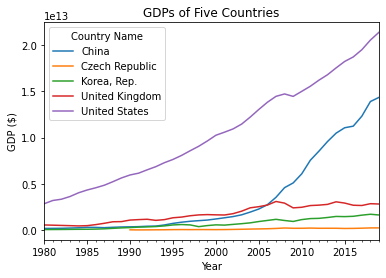

In [87]:
GDP.plot()

plt.title('GDPs of Five Countries')
plt.ylabel('GDP ($)')
plt.xlabel('Year')
plt.show()

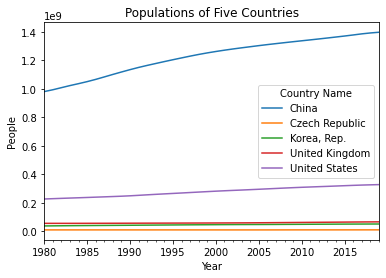

In [88]:
POP = combined_3['Population']

POP.plot()

plt.title('Populations of Five Countries')
plt.ylabel('People')
plt.xlabel('Year')
plt.show()

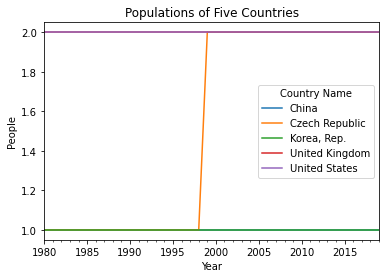

In [96]:
NATO = combined_3['NATO Membership']

NATO.plot()

plt.title('Populations of Five Countries')
plt.ylabel('People')
plt.xlabel('Year')
plt.show()

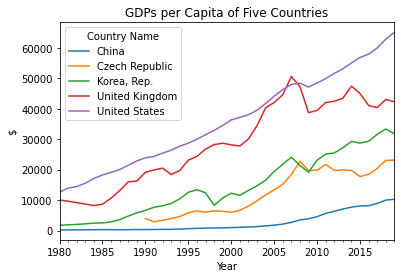

In [99]:
GDP_CAP = GDP/POP

GDP_CAP.plot()

plt.title('GDPs per Capita of Five Countries')
plt.ylabel('$')
plt.xlabel('Year')
plt.show()

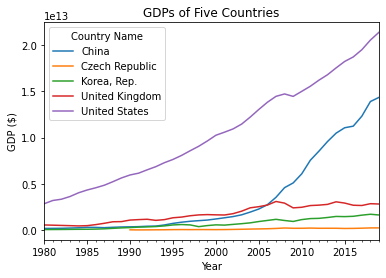

In [100]:
GDP.plot()

plt.title('GDPs of Five Countries')
plt.ylabel('GDP ($)')
plt.xlabel('Year')
plt.show()

# **4. 경제성장률의 근사(approximation)를 통한 log 변환의 이해와 주의할 점**

$\ln(x) \approx x-1$.   (at around $x = 1$).

<img src=https://xaktly.com/Images/Mathematics/LinearApproximation/Example1Graph.png width="350">

$\ln(1+x) \approx x$. (at around $x = 0$). (위의 그림에서 왼쪽으로 1만큼 평행이동한 것과 같습니다.)

$\ln(1+g_t) \approx g_t$  (경제성장률은 커봐야 0.1쯤이다.)

좌변을 풀어보자.

$\ln(1+ \frac{y_t - y_{t-1}}{y_{t-1}}) = \ln(1+\frac{y_t}{y_{t-1}} -1) = \ln(\frac{y_t}{y_{t-1}}) = \ln y_t - \ln y_{t-1} = \frac{\ln y_t - \ln y_{t-1}}{t - (t-1)}$

결국, $\ln y$의 기울기가 곧 성장률($g_t$)이 된다고 볼 수 있다.

즉, GDP($y_t$)에 로그($\ln$)를 취한 후에 그 기울기를 보면 된다.

GDP 그래프에서는 눈으로는 경제성장률을 파악하기 어려운 상황이었는데,

GDP에 로그 변환을 취하면 눈으로 경제성장률을 확인할 수 있다.



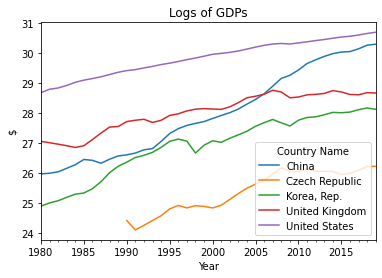

In [107]:
import numpy as np

log_GDP = np.log(GDP)

log_GDP.plot()

plt.title('Logs of GDPs')
plt.ylabel('$')
plt.xlabel('Year')
plt.show()

In [115]:
a = log_GDP.diff()

In [111]:
type(a)

pandas.core.frame.DataFrame

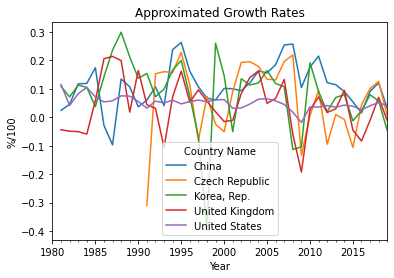

In [114]:
a.plot()

plt.title('Approximated Growth Rates')
plt.ylabel('%/100')
plt.xlabel('Year')
plt.show()



*   ##    로그 변환을 할 때 주의할 점에는 무엇이 있을까요? (힌트: 아래의 그림)



<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Logarithm_plots.png/300px-Logarithm_plots.png width="300">
